About Dataset
🦠 Breast Cancer Data Set
This dataset contains the characteristics of patients diagnosed with cancer. The dataset contains a unique ID for each patient, the type of cancer (diagnosis), the visual characteristics of the cancer and the average values of these characteristics.

📚 The main features of the dataset are as follows:
id: Represents a unique ID of each patient.
diagnosis: Indicates the type of cancer. This property can take the values "M" (Malignant - Benign) or "B" (Benign - Malignant).
radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean: Represents the mean values of the cancer's visual characteristics.
There are also several categorical features where patients in the dataset are labeled with numerical values. You can examine them in the Chart area.

Other features contain specific ranges of average values of the features of the cancer image:

radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean
Each of these features is mapped to a table containing the number of values in a given range. You can examine the Chart Tables

Each sample contains the patient's unique ID, the cancer diagnosis and the average values of the cancer's visual characteristics.

Such a dataset can be used to train or test models and algorithms used to make cancer diagnoses. Understanding and analyzing the dataset can contribute to the improvement of cancer-related visual features and diagnosis.

✨ Examples of Projects that can be done with the Data Set
Logistic Regression: This algorithm can be used effectively for binary classification problems. In this dataset, logistic regression may be an appropriate choice since there are "Malignant" (benign) and "Benign" (malignant) classes. It can be used to predict cancer type with the visual features in the dataset.

K-Nearest Neighbors (KNN): KNN classifies an example by looking at the k closest examples around it. This algorithm assumes that patients with similar characteristics tend to have similar types of cancer. KNN can be used for cancer diagnosis by taking into account neighborhood relationships in the data set.

Support Vector Machines (SVM): SVM is effective for classification tasks, especially for two-class problems. Focusing on the clear separation of classes in the dataset, SVM is a powerful algorithm that can be used for cancer diagnosis.

Data Set Related Training Notebooks 😊 ("I Recommend You Review")
K-NN Project: https://www.kaggle.com/code/erdemtaha/prediction-cancer-data-with-k-nn-95

Logistic Regressüon: https://www.kaggle.com/code/erdemtaha/cancer-prediction-96-5-with-logistic-regression

💖 Acknowledgements and Information
This is a copy of content that has been elaborated for educational purposes and published to reach more people, you can access the original source from the link below, please do not forget to support that data

🔗 https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

This database can also be accessed via the UW CS ftp server:
🔗 ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

It can also be found at the UCI Machine Learning Repository:
🔗 https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

📩 Personal Information:
If you have some questions or curiosities about the data or studies, you can contact me as you wish from the links below 😊

LinkedIn: https://www.linkedin.com/in/erdem-taha-sokullu/

Mail: erdemtahasokullu@gmail.com

Github: https://github.com/Prometheussx

Kaggle: https://www.kaggle.com/erdemtaha

# Study Model - Logistic Regression - Breast Cancer

# Libraries

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression


In [2]:
df = pd.read_csv('Cancer_Data.csv', sep=',')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Check DF format
df.shape

(569, 33)

In [4]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

# Features Analyses

In [ ]:
# Drop unnecessary columns
df = df.drop(['Unnamed: 32', 'id'], axis=1)

In [6]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
df.dtypes 

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [8]:
corr = df.select_dtypes('number').corr() 
corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


<Axes: >

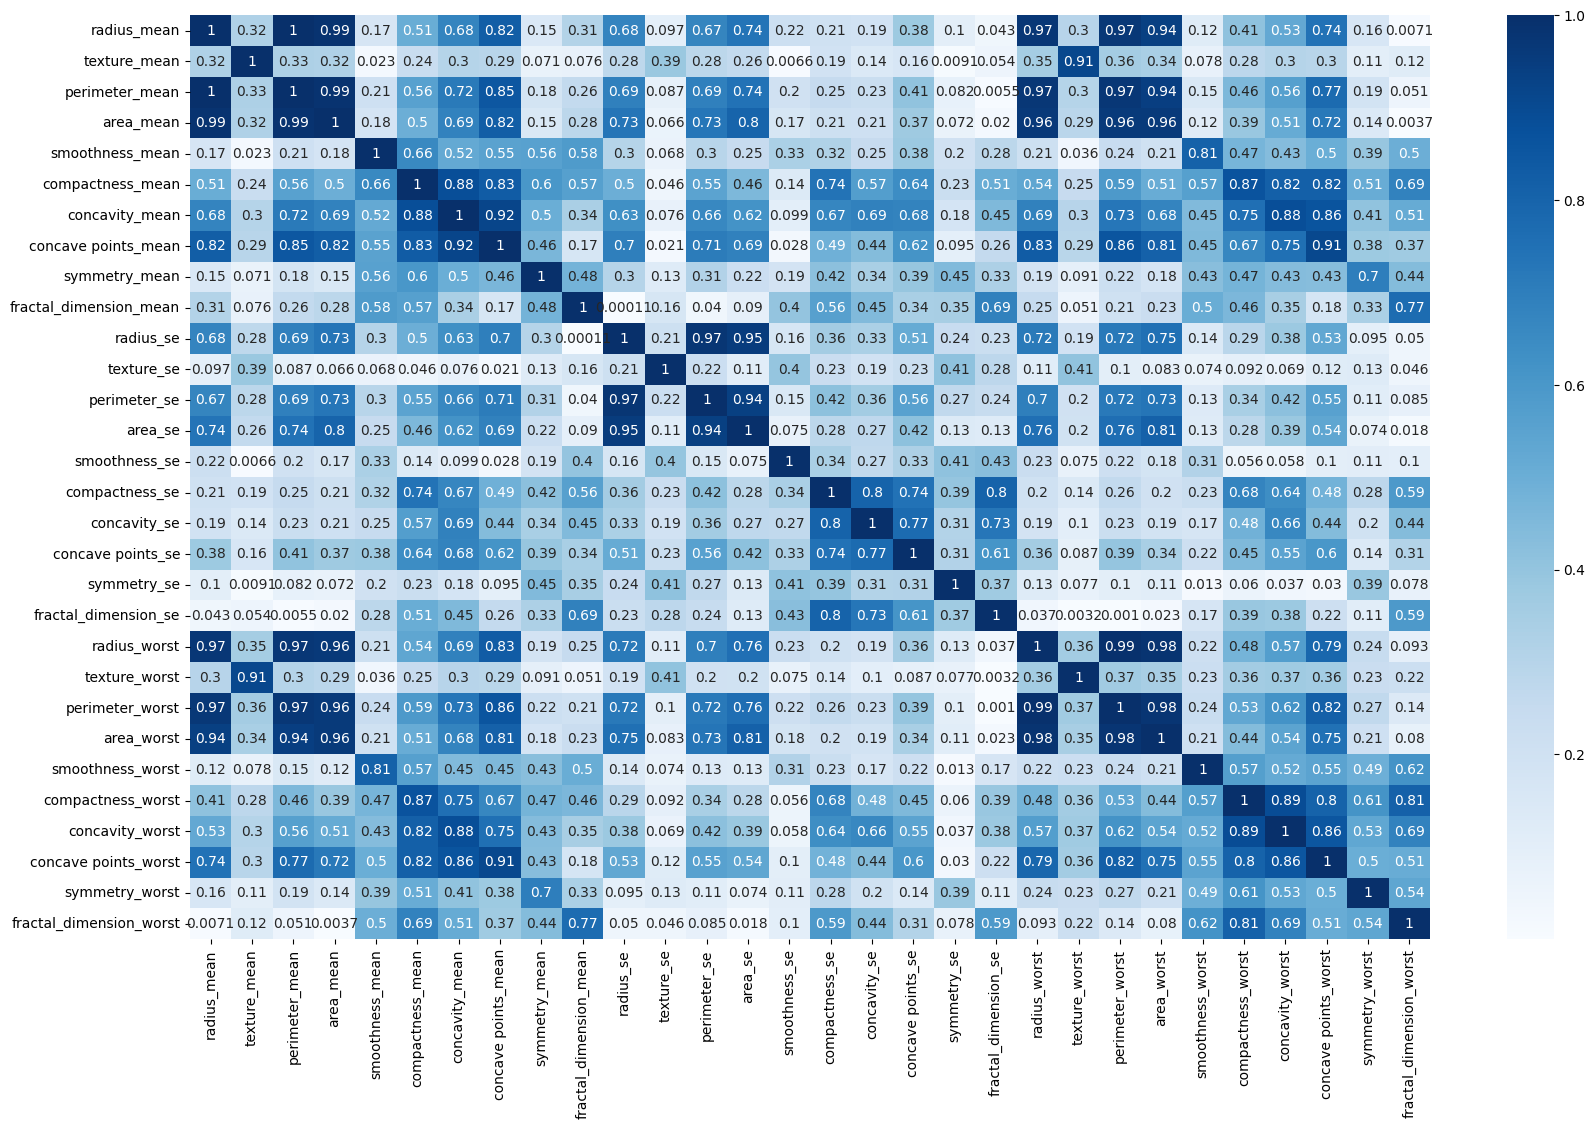

In [9]:
fig, ax = plt.subplots(figsize=(20,12))  
sns.heatmap(corr.abs(), cmap='Blues', annot=True) #ou sns.heatmap(corr, cmap='Blues', annot=True) 

# Target Analyses

In [10]:
# Check for non-target nulls
df['diagnosis'].isnull().sum() 

0

In [11]:
# Verify opctions
df['diagnosis'].unique() 

array(['M', 'B'], dtype=object)

In [12]:
# See options
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [13]:
# Transform data to 0 and 1
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})


In [14]:
# See options
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

# Prepare Features and Target

In [17]:
y = df['diagnosis']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [15]:
X = df.drop('diagnosis', axis=1)

X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [18]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [19]:
# check how the distribution is
print(f'Features X_train: {X_train.shape}')
print(f'Features X_test: {X_test.shape}')
print(f'Features y_train: {y_train.shape}')
print(f'Features y_test: {y_test.shape}')

Features X_train: (455, 30)
Features X_test: (114, 30)
Features y_train: (455,)
Features y_test: (114,)


In [20]:
# normalize numerical data X_train and X_test
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.065527,0.257694,0.077323,0.034369,0.487226,0.417506,0.733365,0.217445,0.504004,0.642376,...,0.059645,0.283316,0.055971,0.025084,0.523195,0.449380,1.000000,0.601375,0.524936,0.529502
1,0.656203,0.570172,0.674207,0.489402,0.554934,0.903431,0.582709,0.743539,0.655633,0.505897,...,0.657920,0.571962,0.620253,0.462832,0.529308,0.802879,0.541534,0.997595,0.499310,0.621906
2,0.072579,0.140345,0.080239,0.038831,0.221901,0.233306,0.140300,0.108350,0.626802,0.414280,...,0.048681,0.192164,0.056428,0.021462,0.184677,0.154303,0.111581,0.174811,0.338459,0.253137
3,0.144914,0.524518,0.142908,0.075774,0.396678,0.181357,0.055740,0.080268,0.389749,0.280750,...,0.130546,0.617537,0.119414,0.057587,0.534742,0.123555,0.089856,0.210859,0.363493,0.224059
4,0.121407,0.174839,0.118296,0.060714,0.548614,0.209677,0.025398,0.064115,0.841431,0.413648,...,0.085593,0.144723,0.078135,0.035977,0.382599,0.078376,0.017316,0.088625,0.392667,0.213293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,0.058622,0.166723,0.077323,0.031580,0.408053,0.457914,0.201640,0.142744,0.392419,0.839090,...,0.038557,0.097281,0.041025,0.015085,0.336412,0.237544,0.114537,0.164467,0.135817,0.452357
451,0.193398,0.291512,0.193840,0.103879,0.555836,0.281899,0.165651,0.173211,0.338494,0.320977,...,0.163073,0.459488,0.157694,0.073963,0.663112,0.262143,0.229473,0.418557,0.244628,0.304595
452,0.323179,0.240446,0.301465,0.198318,0.105263,0.025238,0.016987,0.031064,0.182061,0.080034,...,0.227761,0.230011,0.203091,0.114381,0.098485,0.025335,0.030879,0.114536,0.176030,0.052221
453,0.307997,0.335137,0.307298,0.184116,0.481809,0.321622,0.263824,0.321223,0.268019,0.326032,...,0.305606,0.500533,0.302018,0.160207,0.612171,0.361856,0.325000,0.627835,0.318155,0.427772


In [21]:
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X.columns)
X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.300949,0.379584,0.292068,0.195099,0.455827,0.226648,0.213239,0.207100,0.468581,0.371851,...,0.286645,0.350447,0.278990,0.151749,0.405691,0.182302,0.241719,0.354029,0.373774,0.191647
1,0.655683,0.513875,0.624931,0.568752,0.316914,0.217287,0.287693,0.430949,0.282774,0.065502,...,0.689332,0.406403,0.705972,0.517679,0.232598,0.178115,0.243167,0.623997,0.254259,0.046076
2,0.464883,0.423191,0.453449,0.349034,0.594595,0.279904,0.390517,0.438320,0.471831,0.178032,...,0.461319,0.389674,0.455346,0.299002,0.494837,0.183897,0.343077,0.528078,0.328085,0.142405
3,0.297111,0.333994,0.295043,0.186970,0.539378,0.309922,0.206207,0.151707,0.406826,0.616728,...,0.201547,0.300548,0.239623,0.101823,0.423520,0.207326,0.217466,0.257063,0.255550,0.232671
4,0.249959,0.173439,0.241641,0.149553,0.458588,0.246659,0.179462,0.140596,0.410618,0.509237,...,0.176303,0.207384,0.173421,0.083960,0.345517,0.156381,0.162624,0.241298,0.196954,0.150152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0.419924,0.292864,0.394801,0.301240,0.263441,0.101349,0.138306,0.151274,0.189057,0.029896,...,0.347313,0.373522,0.339813,0.198904,0.194711,0.151596,0.220543,0.273038,0.229479,0.046548
110,0.498328,0.431615,0.472242,0.388700,0.340017,0.157059,0.260229,0.359783,0.399783,0.041989,...,0.482085,0.348140,0.479186,0.319638,0.460664,0.149104,0.256018,0.530171,0.279814,0.032469
111,0.248862,0.197721,0.235534,0.151513,0.479802,0.137176,0.115290,0.158753,0.445829,0.302990,...,0.192182,0.250937,0.186258,0.094431,0.378204,0.102945,0.163258,0.335124,0.283428,0.128259
112,0.396897,0.837958,0.381803,0.276967,0.202703,0.220515,0.293820,0.238916,0.152763,0.289889,...,0.318404,0.809057,0.318418,0.178268,0.149395,0.187088,0.277285,0.286676,0.083634,0.127383


In [22]:
X_train.isnull().values.any()

False

# Linear Regression (ML - Model)

In [23]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [24]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1], dtype=int64)

In [25]:
pd.Series(y_pred).value_counts()

0    67
1    47
Name: count, dtype: int64

# Model accuracy

In [26]:
print(f"Accuracy: {model.score(X_train, y_train)}")

Accuracy: 0.9692307692307692


## the model correctly predicted ~96.9% of the diagnoses in the training data